<h3> Q1 </h3>
1. Deep Learning 폴더 만들기 <br>
2. Deep Learning 폴더 안에 common 이라는 이름의 폴더, dataset이라는 이름의 폴더 만들기 <br>
[현재 상태]<br>
./Deep Learning<br>
./Deep Learning/common<br>
./Deep Learning/dataset<br>
이런 형식을 존재함

<h3> Q2 </h3>

In [10]:
import numpy as np
### (1), (2), (3) -> AND, NAND, OR, XOR 구현하기

def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.4, 0.4])
    b = -0.6
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.4, -0.4])
    b = 0.6
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.4, 0.4])
    b = -0.3
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1
    
print('AND 게이트 결과 : ', AND(0, 0), AND(0, 1), AND(1,0), AND(1, 1))
print('NAND 게이트 결과 : ', NAND(0, 0), NAND(0, 1), NAND(1, 0), NAND(1, 1))
print('OR 게이트 결과 : ', OR(0, 0), OR(0, 1), OR(1, 0), OR(1, 1))

AND 게이트 결과 :  0 0 0 1
NAND 게이트 결과 :  1 1 1 0
OR 게이트 결과 :  0 1 1 1


In [12]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

print('XOR 게이트 결과 : ', XOR(0, 0), XOR(0, 1), XOR(1, 0), XOR(1, 1))

## (4)번 문항 -> NAND, OR를 이용하지 않고 선형 분류기를 이용하는 방법
def XOR2(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.4, 0.4])
    b = 0.6
    tmp = np.sum(w*x)
    if ((tmp + b) > 0) | ((tmp - b) <= 0):
        return 0   
    else:
        return 1
    
    
print('4번 문항에서의 XOR 게이트 결과 : ', XOR(0, 0), XOR(0, 1), XOR(1, 0), XOR(1, 1))

XOR 게이트 결과 :  0 1 1 0
4번 문항에서의 XOR 게이트 결과 :  0 1 1 0


<h3> Q3 </h3>

In [31]:
def step_function(x):
    return np.array(x > 0, dtype = np.int8)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def identity_function(x):
    return x

def hyperbolic_tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def leaky_relu(x):
    return np.maximum(0.01*x, x)

np.random.seed(42)
x = np.random.normal(size = 25).reshape(-1, 5)
print('x \n', x)
print('step_function(x) \n ', step_function(x))
print('relu(x) \n', relu(x))
print('identity_function(x) \n', identity_function(x))
print('hyperbolic_tanh(x) \n', hyperbolic_tanh(x))
print('leaky_relu(x) \n', leaky_relu(x))

x 
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2257763   0.0675282  -1.42474819 -0.54438272]]
step_function(x) 
  [[1 0 1 1 0]
 [0 1 1 0 1]
 [0 0 1 0 0]
 [0 0 1 0 0]
 [1 0 1 0 0]]
relu(x) 
 [[0.49671415 0.         0.64768854 1.52302986 0.        ]
 [0.         1.57921282 0.76743473 0.         0.54256004]
 [0.         0.         0.24196227 0.         0.        ]
 [0.         0.         0.31424733 0.         0.        ]
 [1.46564877 0.         0.0675282  0.         0.        ]]
identity_function(x) 
 [[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
 [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]
 [-0.46341769 -0.46572975  0.24196227 -1.91328024 -1.72491783]
 [-0.56228753 -1.01283112  0.31424733 -0.90802408 -1.4123037 ]
 [ 1.46564877 -0.2

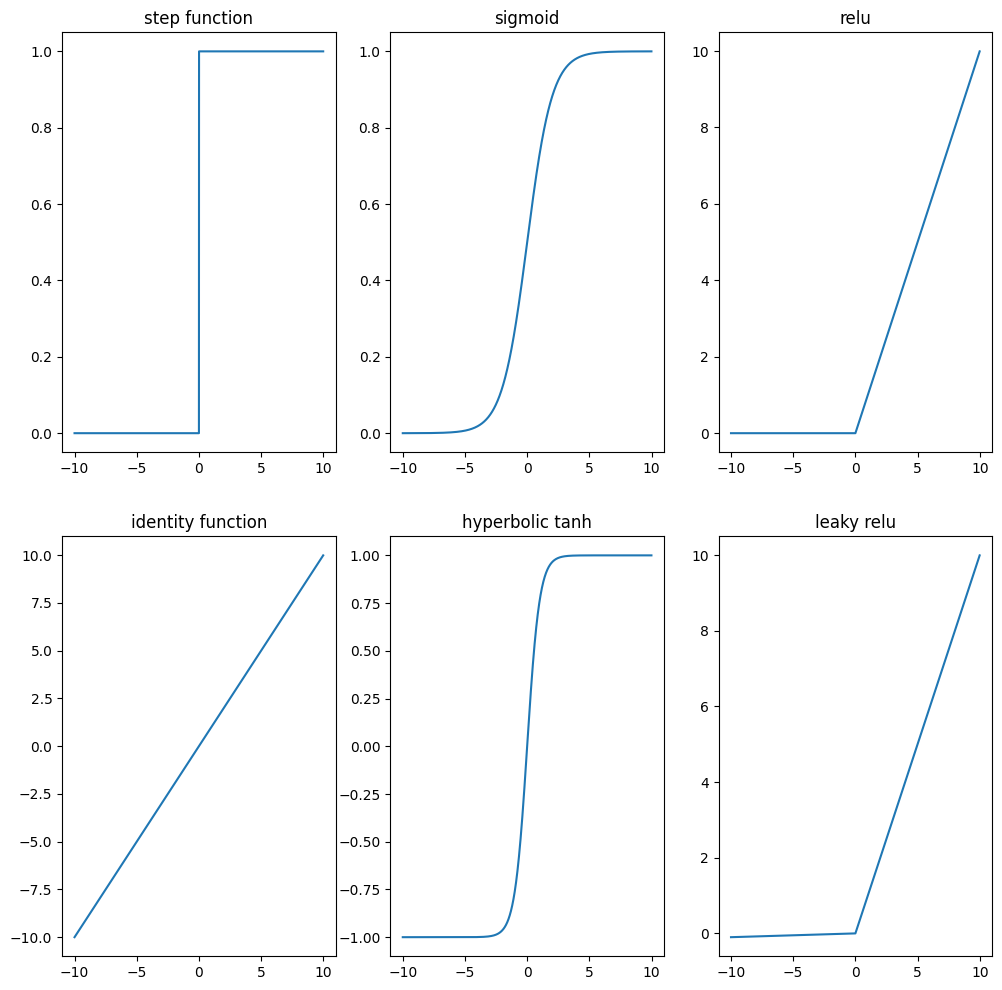

In [39]:
import matplotlib.pyplot as plt

title = ['step function', 'sigmoid', 'relu', 'identity function', 'hyperbolic tanh', 'leaky relu']

x = np.arange(-10, 10, 0.01)
function_list = [step_function(x), sigmoid(x), relu(x), identity_function(x), hyperbolic_tanh(x), leaky_relu(x)]

fig, ax = plt.subplots(2, 3, figsize = (12, 12))

for i, name in enumerate(title):
    ax[i // 3][i % 3].plot(x, function_list[i])
    ax[i // 3][i % 3].set_title(title[i])